# COVID-19 Projections for Colorado, USA
* Using data from http://www.healthdata.org/covid

*Step 1: Import Python Packages and Define Helper Functions*

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')

def plot_eleven_columns_using_plotly_regular(dataframe,
                                             column_one,
                                             column_two,
                                             column_three,
                                             column_four,
                                             column_five,
                                             column_six,
                                             column_seven,
                                             column_eight,
                                             column_nine,
                                             column_ten,
                                             column_eleven,
                                             title):    
    '''
    This function plots four numerical columns against a date column.
    It using the regular plotly library instead of plotly express.
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_one],
                        mode='lines+markers',name=column_one))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_two],
                        mode='lines+markers',name=column_two))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_three],
                        mode='lines+markers',name=column_three))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_four],
                        mode='lines+markers',name=column_four))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_five],
                        mode='lines+markers',name=column_five))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_six],
                        mode='lines+markers',name=column_six))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_seven],
                        mode='lines+markers',name=column_seven))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_eight],
                        mode='lines+markers',name=column_eight))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_nine],
                        mode='lines+markers',name=column_nine))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_ten],
                        mode='lines+markers',name=column_ten))
    fig.add_trace(go.Scatter(x=dataframe.date, y=dataframe[column_eleven],
                        mode='lines+markers',name=column_eleven))
    fig.update_layout(title={'text':title},
                      xaxis_title='Date',yaxis_title='Average of upper and lower predictions',
                      legend_orientation="h",showlegend=True)
    #fig.update_layout(xaxis=dict(range=[lower_axis_limit,upper_axis_limit]))
    fig.show()    
    
def plot_eleven_columns_using_plotly_express(dataframe,
                                             column_one,
                                             column_two,
                                             column_three,
                                             column_four,
                                             column_five,
                                             column_six,
                                             column_seven,
                                             column_eight,
                                             column_nine,
                                             column_ten,
                                             column_eleven,
                                             title):
    '''
    This function plots four numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='date', value_vars=[column_one,
                                                         column_two,
                                                         column_three,
                                                         column_four,
                                                         column_five,
                                                         column_six,
                                                         column_seven,
                                                         column_eight,
                                                         column_nine,
                                                         column_ten,
                                                         column_eleven])
    fig = px.line(df_melt, x="date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='date',yaxis_title='Average of upper and lower predictions',legend_orientation="h",showlegend=True))
    #fig.update_xaxes(range=[lower_axis_limit,upper_axis_limit])
    fig.show()
    


*Step 2: Load the Data*

In [2]:
todays_date = '4/05/2020' # Update this line every time that you rerun the notebook
df = pd.read_csv('/kaggle/input/ihmes-covid19-projections/2020_04_05.05.us/Hospitalization_all_locs.csv')
df_colorado = df[df.location_name=='Colorado']
df_colorado = df_colorado[['date', 
                           'allbed_mean',
                           'ICUbed_mean', 
                           'InvVen_mean',  
                           'deaths_mean',
                           'admis_mean', 
                           'newICU_mean', 
                           'newICU_lower', 
                           'newICU_upper',
                           'totdea_mean', 
                           'bedover_mean',
                           'icuover_mean']]
df_colorado[40:50].head()

,date,allbed_mean,ICUbed_mean,InvVen_mean,deaths_mean,admis_mean,newICU_mean,newICU_lower,newICU_upper,totdea_mean,bedover_mean,icuover_mean
8909,2020-03-17,39.860068,6.724482,5.706076,1.0,15.728250,2.870261,2.45,3.35,2.0,0.0,0.0
8910,2020-03-18,46.723787,6.724482,5.706674,0.0,7.863718,1.000000,1.00,1.00,2.0,0.0,0.0
8911,2020-03-19,48.143163,7.724482,6.558761,2.0,7.841171,1.000000,1.00,1.00,4.0,0.0,0.0
8912,2020-03-20,109.245008,14.586450,12.404253,0.0,63.101845,8.861968,8.45,9.35,4.0,0.0,0.0
8913,2020-03-21,119.910908,18.022416,15.316263,0.0,23.651442,3.435966,3.15,3.80,4.0,0.0,0.0


*Step 3: Plot using Pandas*

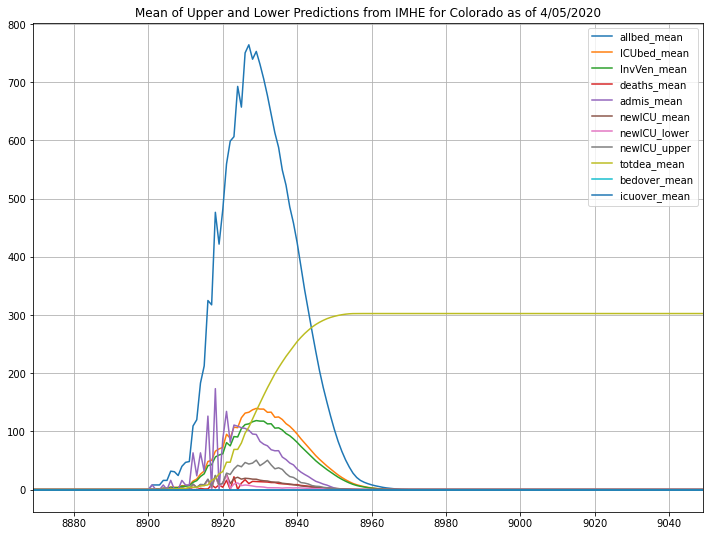

In [3]:
title = 'Mean of Upper and Lower Predictions from IMHE for Colorado as of '+todays_date
df_colorado.plot(title=title,figsize=(12,9), grid=True)

*Step 4: Plot using Plotly*

In [4]:
plot_eleven_columns_using_plotly_regular(dataframe=df_colorado,
                                        column_one='allbed_mean',
                                        column_two='ICUbed_mean',
                                        column_three='InvVen_mean',
                                        column_four='deaths_mean',
                                        column_five='admis_mean',
                                        column_six='newICU_mean',
                                        column_seven='newICU_lower',
                                        column_eight='newICU_upper',
                                        column_nine='totdea_mean',
                                        column_ten='bedover_mean',
                                        column_eleven='bedover_mean',
                                        title='Mean of Upper and Lower Predictions from IMHE for Colorado as of '+todays_date)

*Step 4: Plot using Plotly Express*

In [5]:
plot_eleven_columns_using_plotly_express(dataframe=df_colorado,
                                        column_one='allbed_mean',
                                        column_two='ICUbed_mean',
                                        column_three='InvVen_mean',
                                        column_four='deaths_mean',
                                        column_five='admis_mean',
                                        column_six='newICU_mean',
                                        column_seven='newICU_lower',
                                        column_eight='newICU_upper',
                                        column_nine='totdea_mean',
                                        column_ten='bedover_mean',
                                        column_eleven='bedover_mean',
                                        title='Mean of Upper and Lower Predictions from IMHE for Colorado as of '+todays_date)